# **Facial Emotion Detection**

## **Problem Definition**

**Context:** The goal of artifical intelligence is to replicate human intelligence in performing certain tasks. In recent years, research has focused on predictive tasks that require assessing nonstructured data to better respond to users. Humans convey meaning though multimodal communication strategies including language, gestures, facial expressions and tone of voice. Since human emotion is abstract and subjective, it is arguably the hardest to predict. AI models could better interpret a user's experience and requests by assessing their emotional state. <br> <br> If AI models can interpret a user's emotions in real time, they can improve a user's experience, and assist a human facilitator. For example, one application could be in online education platforms. An effective classroom instructor leverages multimodal communication strategies to design lessons, and assess learning goals in real time. AI models designed to detect and analyze nonverbal cues could provide real time feedback to instructors teaching online. <br> <br>

**The objectives:**
* Build, train, and test models designed to predict the emotion conveyed through facial expressions in images.
* Compare models and architecture, identify factors that improve accuracy or reduce computational demands. <br> <br>

**The key questions:**
*  What emotions can be classified well? When, or how frequently, is an image misclassified?
* What emotions are difficult to classify? When, or how frequently, do expressions convey a combination of emotions?
* What features of the image best identify the emotion expressed? <br> <br>

**The problem formulation:** What are we trying to solve using data science?
* What models and architecture yield the highest accuracy?
* What models and architecture reduce computational demands?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive # mount to Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import numpy as np # data processing
import cv2 # image and video processing platform
import pandas as pd # tabular data analysis
import matplotlib.pyplot as plt # plots
from matplotlib import colormaps
import seaborn as sns # plotting

from sklearn.model_selection import train_test_split # partition the data into train set and test set
from sklearn.preprocessing import MinMaxScaler # normalize vectors in preprocessing
from sklearn.datasets import make_classification

import tensorflow as tf
import keras # higher level abstractions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# misc operating system interfaces
import os

# extract zip file
import zipfile
path = '/content/drive/MyDrive/MIT ADSP/8. Capstone/Facial_emotion_images.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [ ]:
# Store the path, define the categories, and image size
DATADIR = '/content/Facial_emotion_images/'
DATADIR_train = '/content/Facial_emotion_images/train/' # define path of training data after unzipping
DATADIR_test = '/content/Facial_emotion_images/test/' # define path of testing data after unzipping
DATADIR_validation = '/content/Facial_emotion_images/validation/' # define path of validation data after unzipping
CATEGORIES = ['happy', 'neutral', 'sad', 'surprise'] # store the categories in 'CATEGORIES' variable
IMG_SIZE = 48 # define the size of the image to 48

In [ ]:
training_data = []

# Define a function to extract the training data
def create_training_data():
  for category in CATEGORIES: # loop over categories
    path = os.path.join(DATADIR_train, category) # join training images and labels
    class_name = category

    for img in os.listdir(path):  # loop over images
      img_array = cv2.imread(os.path.join(path, img)) # read the data
      img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize the data
      training_data.append([img_array_resized, class_name])

# call the function
create_training_data()

# take a look at the first training data image
training_data[0]

[array([[[227, 227, 227],
         [228, 228, 228],
         [227, 227, 227],
         ...,
         [  9,   9,   9],
         [  9,   9,   9],
         [  9,   9,   9]],
 
        [[227, 227, 227],
         [228, 228, 228],
         [230, 230, 230],
         ...,
         [ 12,  12,  12],
         [ 11,  11,  11],
         [ 10,  10,  10]],
 
        [[224, 224, 224],
         [227, 227, 227],
         [226, 226, 226],
         ...,
         [ 12,  12,  12],
         [ 12,  12,  12],
         [ 13,  13,  13]],
 
        ...,
 
        [[224, 224, 224],
         [227, 227, 227],
         [224, 224, 224],
         ...,
         [ 19,  19,  19],
         [ 21,  21,  21],
         [ 22,  22,  22]],
 
        [[225, 225, 225],
         [225, 225, 225],
         [224, 224, 224],
         ...,
         [ 15,  15,  15],
         [ 22,  22,  22],
         [ 22,  22,  22]],
 
        [[224, 224, 224],
         [223, 223, 223],
         [224, 224, 224],
         ...,
         [ 19,  19,  19],
  

In [ ]:
testing_data = []

# Define a function to extract the testing data
def create_testing_data():
  for category in CATEGORIES: # loop over categories
    path = os.path.join(DATADIR_test, category) # join testing images and labels
    class_name = category

    for img in os.listdir(path):  # loop over images
      img_array = cv2.imread(os.path.join(path, img)) # read the data
      img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize the data
      testing_data.append([img_array_resized, class_name])

# call the function
create_testing_data()

# take a look at the 100th image in the testing data
testing_data[100]


[array([[[252, 252, 252],
         [253, 253, 253],
         [254, 254, 254],
         ...,
         [219, 219, 219],
         [185, 185, 185],
         [168, 168, 168]],
 
        [[250, 250, 250],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [231, 231, 231],
         [214, 214, 214],
         [213, 213, 213]],
 
        [[246, 246, 246],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [231, 231, 231],
         [226, 226, 226],
         [230, 230, 230]],
 
        ...,
 
        [[172, 172, 172],
         [186, 186, 186],
         [197, 197, 197],
         ...,
         [148, 148, 148],
         [149, 149, 149],
         [146, 146, 146]],
 
        [[184, 184, 184],
         [176, 176, 176],
         [182, 182, 182],
         ...,
         [149, 149, 149],
         [151, 151, 151],
         [149, 149, 149]],
 
        [[185, 185, 185],
         [178, 178, 178],
         [168, 168, 168],
         ...,
         [148, 148, 148],
  

In [ ]:
validation_data = []

# Define a function to extract the testing data
def create_validation_data():
  for category in CATEGORIES: # loop over categories
    path = os.path.join(DATADIR_validation, category) # join testing images and labels
    class_name = category

    for img in os.listdir(path):  # loop over images
      img_array = cv2.imread(os.path.join(path, img)) # read the data
      img_array_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize the data
      validation_data.append([img_array_resized, class_name])

# call the function
create_validation_data()

# take a look at the 4000th image in the validation data set
validation_data[4000]

[array([[[ 11,  11,  11],
         [ 14,  14,  14],
         [ 14,  14,  14],
         ...,
         [ 81,  81,  81],
         [ 70,  70,  70],
         [ 74,  74,  74]],
 
        [[ 11,  11,  11],
         [ 13,  13,  13],
         [ 14,  14,  14],
         ...,
         [ 85,  85,  85],
         [ 80,  80,  80],
         [ 73,  73,  73]],
 
        [[ 12,  12,  12],
         [ 12,  12,  12],
         [ 15,  15,  15],
         ...,
         [ 86,  86,  86],
         [ 81,  81,  81],
         [ 73,  73,  73]],
 
        ...,
 
        [[ 19,  19,  19],
         [ 17,  17,  17],
         [ 18,  18,  18],
         ...,
         [126, 126, 126],
         [114, 114, 114],
         [114, 114, 114]],
 
        [[ 20,  20,  20],
         [ 17,  17,  17],
         [ 17,  17,  17],
         ...,
         [133, 133, 133],
         [119, 119, 119],
         [113, 113, 113]],
 
        [[ 22,  22,  22],
         [ 18,  18,  18],
         [ 17,  17,  17],
         ...,
         [135, 135, 135],
  

In [ ]:
# print the count of images in each set. training, testing and validation
print(f"There are {len(training_data)} images in the training data set.")
print(f"There are {len(testing_data)} images in the testing data set.")
print(f"There are {len(validation_data)} images in the validation data set.")

There are 15109 images in the training data set.
There are 128 images in the testing data set.
There are 4977 images in the validation data set.


### **Happy**

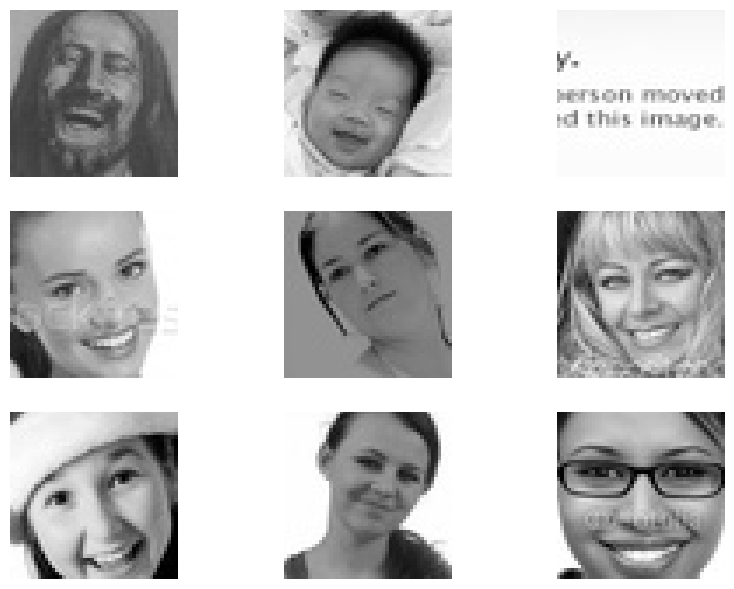

In [ ]:
# Plot a random selection of images labeled 'Happy'
happy_imgs = [view for view in os.listdir(f'{DATADIR_train}/{CATEGORIES[0]}')]
select_happy = np.random.choice(happy_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    find_happy = f'{DATADIR_train}/{CATEGORIES[0]}/{select_happy[i]}'
    view = load_img(find_happy, target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(view)
    plt.axis('off')

plt.show()

**Observations and Insights:** <br> Images labeled 'happy' frequently include open mouth, teeth showing. A unique feature of 'happy' images are laugh lines.
<br> Some images appear surprised, content. We may have some mislabeled data.

### **Sad**

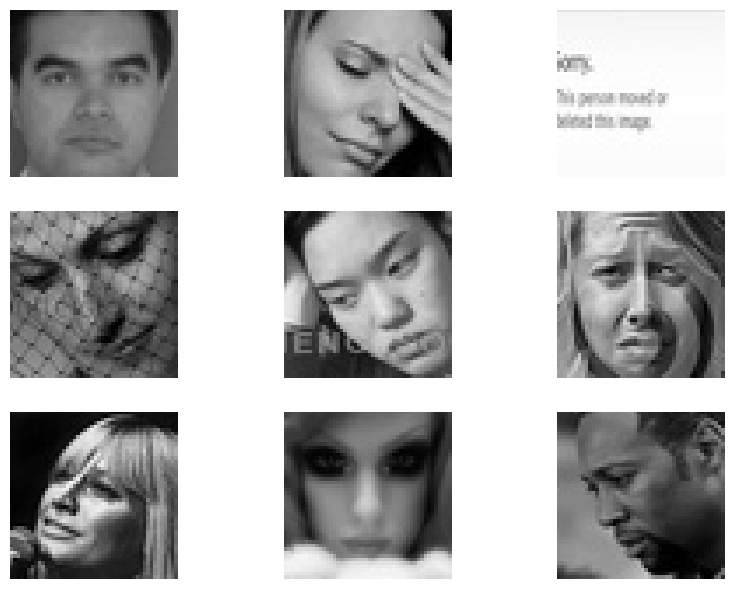

In [ ]:
sad_imgs = [view for view in os.listdir(f'{DATADIR_train}/{CATEGORIES[2]}')]
select_sad = np.random.choice(sad_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    find_sad = f'{DATADIR_train}/{CATEGORIES[2]}/{select_sad[i]}'
    view = load_img(find_sad, target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(view)
    plt.axis('off')

plt.show()

**Observations and Insights:**
<br> Images that convey 'sad' include a convex mouth shape, a frowny face.
<br> Many images appear to be neutral, surprised, tired, angry, or some combination of these with sad. We may have some mislabeled data in the training set. More accurately, we may have images that fail to fit neatly into one the classes. The wide variety of images labeled 'sad' will make it more difficult to differentiate 'sad' from other emotions, resulting in more images misclassified as 'sad'.

### **Neutral**

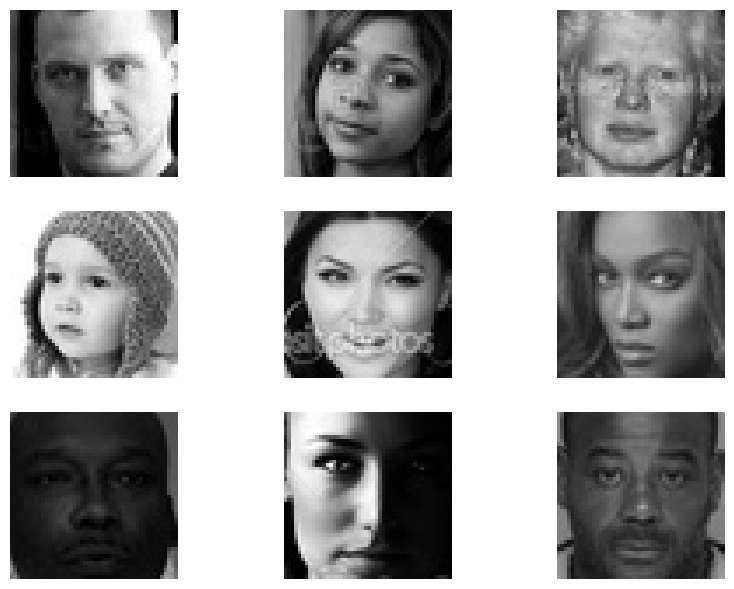

In [ ]:
neutral_imgs = [view for view in os.listdir(f'{DATADIR_train}/{CATEGORIES[1]}')]
select_neutral = np.random.choice(neutral_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    find_neutral = f'{DATADIR_train}/{CATEGORIES[1]}/{select_neutral[i]}'
    view = load_img(find_neutral, target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(view)
    plt.axis('off')

plt.show()

**Observations and Insights:**
<br> Images that convey 'neutral' feature a relaxed facial expression, including lip line with zero curvature and flat brow line.
<br> Some images convey tired, disgusted, even happy. There are a wide variety of emotions not given by one of our classes. Additionally, there are frequently 'happy' images labeled 'neutral', which will make it difficult for any model to differentiate between them.

### **Surprised**

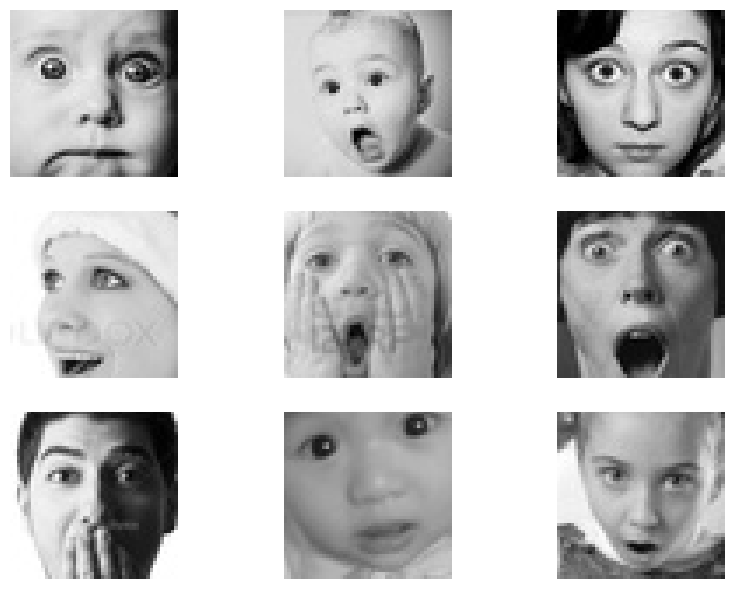

In [ ]:
surprised_imgs = [view for view in os.listdir(f'{DATADIR_train}/{CATEGORIES[3]}')]
select_surprised = np.random.choice(surprised_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
    find_surprised = f'{DATADIR_train}/{CATEGORIES[3]}/{select_surprised[i]}'
    view = load_img(find_surprised, target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(view)
    plt.axis('off')

plt.show()

**Observations and Insights:** <br> Images labeled 'surprise' include a round, open mouth shape and raised eyebrows. Some include hands over the face, mouth. It will be interesting to see how well predictions work for images with this feature.
<br> Again we have some mislabeled data, images that convey another class like 'happy' or an emotion not included in our labels like anger or disgust. This is less frequently observed than in the other classes. So we expect most models to better predict 'surprise' than the other classes.

**Visualizing Classes: Key Takeaways:**
<br>
- Image resolution is low; may require a more complex network to extract features
- 'happy' and 'surprise' have unique features observed consistently in the the labeled data, resulting in better predictions for images that include these features
- 'neutral' and 'sad' have features that are more difficult to define and extract, and training data for these classes frequently includes mislabeled images, which may result in poor predictions





## **Checking Distribution of Classes**

Before we analyze the distribution of classes, we will preprocess the data.

In [ ]:
# Create arrays to store data and labels
X_train = []
y_train = []
X_test = []
y_test = []
X_validate = []
y_validate = []

# commented to maintain order for visualization; shuffle in the data loader to reduce variance
# Shuffle data to reduce variance
# np.random.shuffle(training_data)
# np.random.shuffle(testing_data)
# np.random.shuffle(validation_data)

# Iterate over the training data, append images and labels to the appropriate array
for features, label in training_data:
  X_train.append(features)
  y_train.append(label)

# Iterate over the testing data, append images and labels to the appropriate array
for features, label in testing_data:
  X_test.append(features)
  y_test.append(label)

# Iterate over the validation data, append images and labels to the appropriate array
for features, label in validation_data:
  X_validate.append(features)
  y_validate.append(label)

In [ ]:
# Convert pixel values to Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_validate = np.array(X_validate)

# Convert the label lists to DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)
y_validate = pd.DataFrame(y_validate, columns = ["Label"], dtype = object)

In [ ]:
# Check the distribution of classes in the training data. Print the value count of the labels.
train_count = y_train.Label.value_counts(sort = False)
print(f"The counts for each label in the training data:")
print(train_count)
print()

# Distribution is not uniform - there are far fewer images labeled 'Surprise'.
# Normalize the count to see proportions by label.
print(f"The proportions for each label in the training data")
train_count_proportions = y_train.Label.value_counts(sort = False, normalize = True)
print(train_count_proportions)

The counts for each label in the training data:
happy       3976
neutral     3978
sad         3982
surprise    3173
Name: Label, dtype: int64

The proportions for each label in the training data
happy       0.263154
neutral     0.263287
sad         0.263552
surprise    0.210007
Name: Label, dtype: float64


In [ ]:
# Check the distribution of classes in the validation data. Print the value count of the labels.
validate_count = y_validate.Label.value_counts(sort = False)
print(f"The counts for each label in the validation data:")
print(validate_count)
print()

# Again, there are far fewer images labeled 'surprise' than the other classes.
# Normalize the count to see proportions by label.
print(f"The proportions for each label in the validation data")
validate_count_proportions = y_validate.Label.value_counts(sort = False, normalize = True)
print(validate_count_proportions)

The counts for each label in the validation data:
happy       1825
neutral     1216
sad         1139
surprise     797
Name: Label, dtype: int64

The proportions for each label in the validation data
happy       0.366687
neutral     0.244324
sad         0.228853
surprise    0.160137
Name: Label, dtype: float64


In [ ]:
# Check the distribution of classes in the testing data. Print the value count of the labels.
test_count = y_test.Label.value_counts(sort = False)
print(f"The counts for each label in the testing data:")
print(test_count)
print()

# The distribution of classes in the testing data is uniform.
# Normalize the count to see proportions by label.
print(f"The proportions for each label in the testing data")
test_count_proportions = y_test.Label.value_counts(sort = False, normalize = True)
print(test_count_proportions)

The counts for each label in the testing data:
happy       32
neutral     32
sad         32
surprise    32
Name: Label, dtype: int64

The proportions for each label in the testing data
happy       0.25
neutral     0.25
sad         0.25
surprise    0.25
Name: Label, dtype: float64


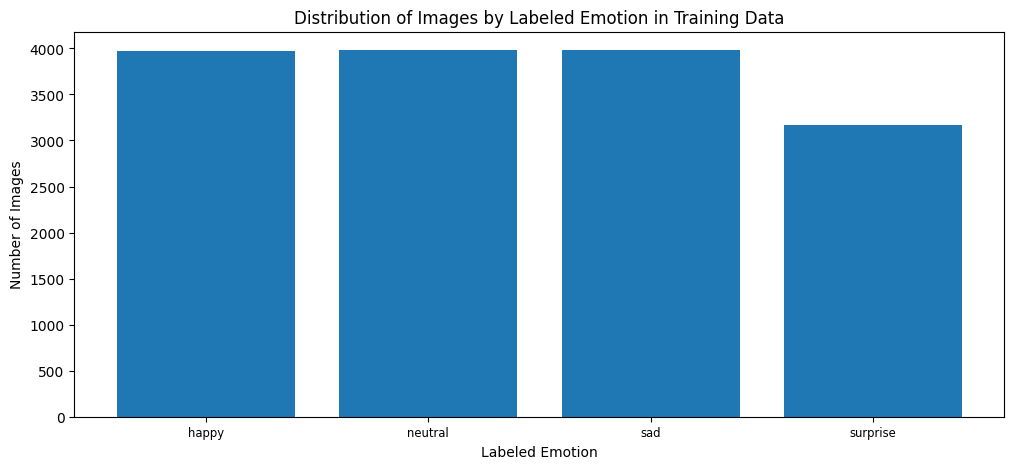

In [ ]:
# Visualize the distribution of classes in each set.
# distribution of classes in the training data
plt.figure(figsize = (12,5))
plt.bar(range(4), train_count.values, align = 'center')
plt.xticks(range(4), CATEGORIES, size = 'small')

# include labels
plt.title('Distribution of Images by Labeled Emotion in Training Data')
plt.xlabel('Labeled Emotion')
plt.ylabel('Number of Images')
plt.xticks(range(4), CATEGORIES, size = 'small')

# let's take a look at the distribution of labels in the training data
plt.show()

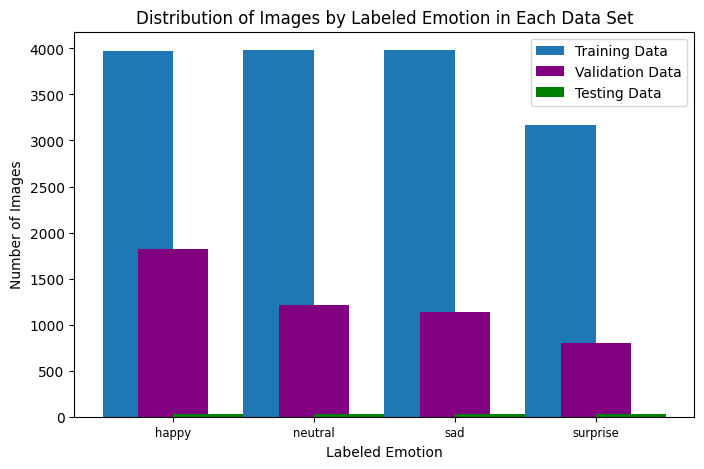

In [ ]:
# grouped bar chart to visualize frequency distributions for training, validation, and test data sets
plt.figure(figsize = (8,5))
xaxis = np.arange(4)

# plot the counts for each class in each data set
plt.bar(xaxis - 0.25, train_count.values, width = 0.5, align = 'center', label = 'Training Data')
plt.bar(xaxis, validate_count.values, width = 0.5, align = 'center', color = 'purple', label = 'Validation Data')
plt.bar(xaxis + 0.25, test_count.values, width = 0.5, align = 'center', color = 'green', label = 'Testing Data')

# include labels
plt.title('Distribution of Images by Labeled Emotion in Each Data Set')
plt.legend()
plt.xlabel('Labeled Emotion')
plt.ylabel('Number of Images')
plt.xticks(range(4), CATEGORIES, size = 'small')

# let's see the distributions
plt.show()


**Observations and Insights:**
<br> The distribution of classes given by the count and proportion of labels used for training is not uniform. There are far fewer images labeled 'surprise' in the training and validation data sets. This means the model has fewer 'surprise' images on which to train and adjust weights; this may diminish performance in detecting 'surprise'.

<br> Similarly, there are far fewer images labeled 'neutral' and 'sad' in the validation data; this may diminish performance in detecting these classes. Similar features between 'neutral' and 'sad' images will make them harder to differentiate. We expect models confuse 'neutral' and 'sad' images more often.

<br> To compensate for imbalances in the distributions, we have options including augmentation, and class weights. We will choose to augment the training and validation data sets to include horizontal reflections, and a range of brightness, and sheer. We might also adjust the weights of the classes, giving the 'surprise' class a greater weight in order to compensate for fewer images. When building the CNN models, we will use the Adam optimizer to adjust weights and reduce loss.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

Before building the data loaders, encode the target variable

In [ ]:
# Encode the target variable
y_train_encoded = []
y_test_encoded = []
y_validate_encoded = []

for label_name in y_train["Label"]:
  if (label_name == "happy"):
    y_train_encoded.append(0)
  if (label_name == "neutral"):
    y_train_encoded.append(1)
  if (label_name == "sad"):
    y_train_encoded.append(2)
  if (label_name == "surprise"):
    y_train_encoded.append(3)

for label_name in y_test["Label"]:
  if (label_name == "happy"):
    y_test_encoded.append(0)
  if (label_name == "neutral"):
    y_test_encoded.append(1)
  if (label_name == "sad"):
    y_test_encoded.append(2)
  if (label_name == "surprise"):
    y_test_encoded.append(3)

for label_name in y_validate["Label"]:
  if (label_name == "happy"):
    y_validate_encoded.append(0)
  if (label_name == "neutral"):
    y_validate_encoded.append(1)
  if (label_name == "sad"):
    y_validate_encoded.append(2)
  if (label_name == "surprise"):
    y_validate_encoded.append(3)

In [ ]:
# Convert encoded test variable to array
y_train_encoded = to_categorical(y_train_encoded, 4)
y_test_encoded = to_categorical(y_test_encoded, 4)
y_validate_encoded = to_categorical(y_validate_encoded, 4)

In [ ]:
# take a look at the encoding of the first image in the validation set
y_validate_encoded[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
BATCH_SIZE = 32

# build data loaders for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    brightness_range = (0.5, 1.5),
    shear_range = 0.3,
    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(
    '/content/Facial_emotion_images/train',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_set = test_datagen.flow_from_directory(
    '/content/Facial_emotion_images/test',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE*4,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    brightness_range = (0.5, 1.5),
    shear_range = 0.3,
    horizontal_flip = True)

validation_set = validation_datagen.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


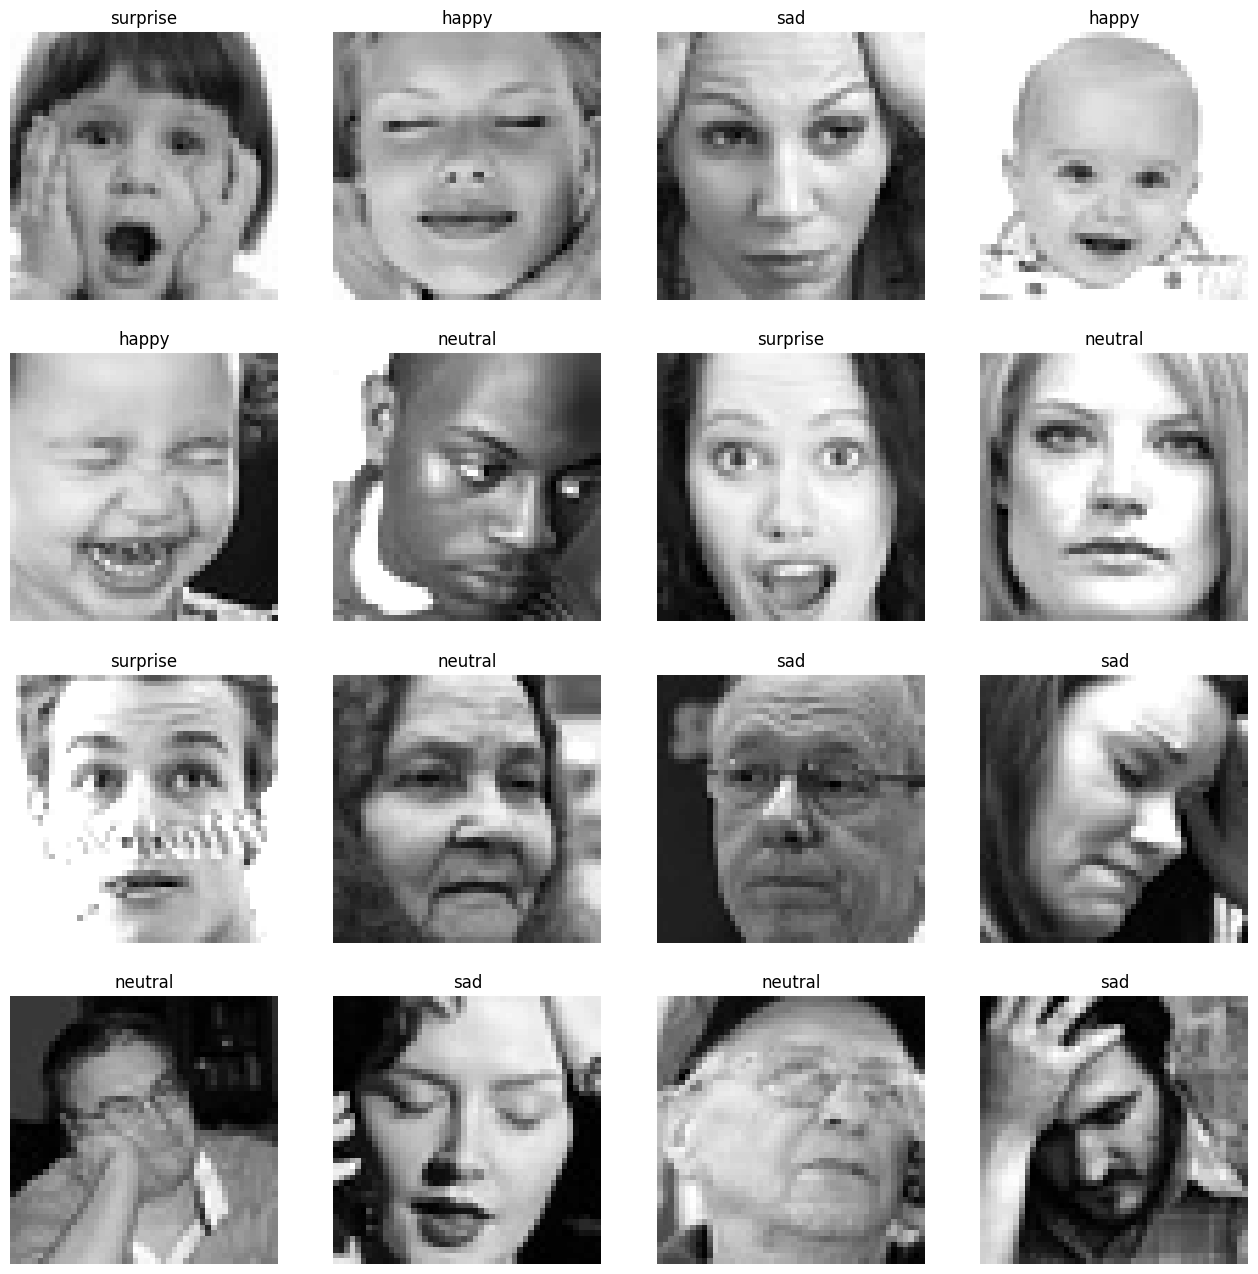

In [ ]:
# view some images in the augmented data
images, categories = next(train_set)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, category, ax) in zip(images, categories, axes.flatten()):
    ax.imshow(image, cmap = 'gray')
    if category[0] == 1:
        ax.set_title('happy')
    elif category[1] == 1:
        ax.set_title('neutral')
    elif category[2] == 1:
        ax.set_title('sad')
    else:
        ax.set_title('surprise')
    ax.axis('off')

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

Convolutional Neural Networks (CNNs) handle large objects well and offer automatic feature extraction, allowing them to capture the spacial features of images. They have proven highly accurate in image recognition tasks. We expect a CNN model to perform best in accurately classifying images.

### **Creating the Base Neural Network**

In [ ]:
# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(512, activation = 'relu'))

model_1.add(Dropout(0.40))

model_1.add(Dense(4, activation = 'softmax'))

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_1.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_1.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_1_v1 = model_1.fit(train_set, validation_data = validation_set, epochs = 20, callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.2864 - accuracy: 0.3860
Epoch 1: val_accuracy improved from -inf to 0.49206, saving model to ./model_1.keras
473/473 [==============================] - 26s 42ms/step - loss: 1.2862 - accuracy: 0.3861 - val_loss: 1.1773 - val_accuracy: 0.4921 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.1304 - accuracy: 0.5014
Epoch 2: val_accuracy improved from 0.49206 to 0.55093, saving model to ./model_1.keras
473/473 [==============================] - 20s 41ms/step - loss: 1.1308 - accuracy: 0.5013 - val_loss: 1.0774 - val_accuracy: 0.5509 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.0422 - accuracy: 0.5481
Epoch 3: val_accuracy improved from 0.55093 to 0.57324, saving model to ./model_1.keras
473/473 [==============================] - 19s 39ms/step - loss: 1.0418 - accuracy: 0.5485 - val_loss: 0.9875 - val_accuracy: 0.5732 - lr: 0.0010
Epoch 4/20
47

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 1 accuracy is {int(model_1_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_1_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 1 accuracy is 69% on the training data and 69% on the validation data.


### **Evaluating the Model on the Test Set**

In [ ]:
# evaluate the testing accuracy
images, categories = next(test_set)
accuracy = model_1.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 1 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.6875
Model 1 accurately predicts 68% of test data images.


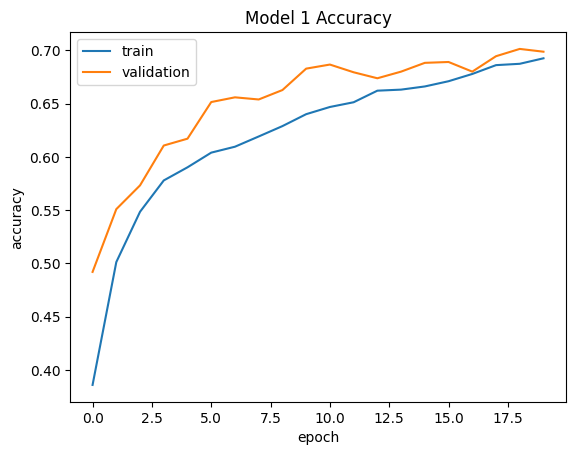

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_1_v1.history['accuracy'])
plt.plot(model_1_v1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.60      0.75      0.67        32
           2       0.48      0.44      0.46        32
           3       0.93      0.88      0.90        32

    accuracy                           0.69       128
   macro avg       0.69      0.69      0.69       128
weighted avg       0.69      0.69      0.69       128



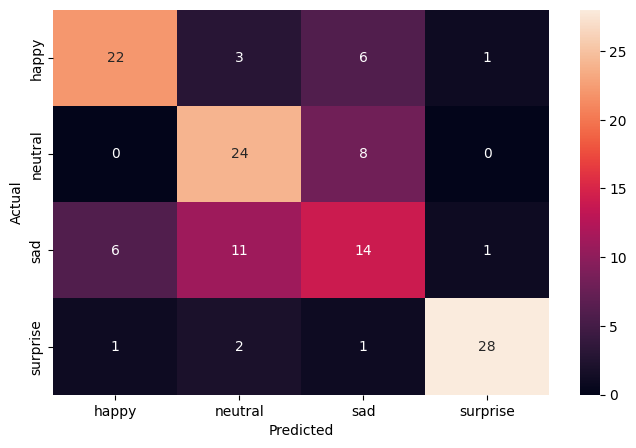

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_1.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**  

I adjusted the image size to try to improve accuracy. I found that increasing the image size did not improve the accuracy of the model, but it did impact runtime to train the model.

Image Size | Execution Time to Train
--- | ---
`IMG_SIZE = 48` | `6m 03s`
`IMG_SIZE = 96` | `11m 30s`
`IMG_SIZE = 150` | `>20m`

It could be that the resolution of images is too low, or it could be that training suffered from mislabeled data.

I adjusted the color mode of the images to try and improve accuracy. I found that "coloring" the grayscale images did not improve the accuracy of the model, but it did increase the runtime to train the model. Converting the color mode to 'rgb' did not improve accuracy because it doesn't add any information to the images.

**Model 1 Performance:**  

*   Model 1 had 605060 trainable parameters, and trained in 7m 14s.
*   Model 1 accuracy is 69% on the training data and 69% on the validation data.

*   Model 1 accurately predicts 69% of test data images.
*   Model 1 most accurately predicts images labeled 'surprise'.
*   Images labeled 'neutral' and 'sad' are the most likely to be misclassified, confused.

**Insights:**
<br>
Model 1 is pretty simple, with just three convolutional blocks. This means less time to train, and low computational demands. But the accuracy of the model is low. We found data augmentation improved performance, compensating for imbalanced distributions. As anticipated, the model frequently confuses 'neutral' and 'sad' images, due to similarity in features of these classes, as well as mislabeled data.

The accuracy of Model 1 varies substantially with each training. We improved training accuracy and reduced noise in the validation accuracy through augmentation. The fluctuations still present may imply overfitting, but testing accuracy is comprable to that of training and validation. The noise we observe in validation accuracy is likely due to mislabeled data in the validation set.

Increasing the complexity of the network may further improve accuracy and reduce noise.



### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture, adding a few convolutional blocks, and batch normalization layers

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 256, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.1))
model_2.add(MaxPooling2D(pool_size = 2))

model_2.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.1))
model_2.add(MaxPooling2D(pool_size = 2))

model_2.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.1))
model_2.add(MaxPooling2D(pool_size = 2))

model_2.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.1))
model_2.add(MaxPooling2D(pool_size = 2))

model_2.add(Flatten())

model_2.add(Dense(512, activation = 'relu'))

model_2.add(Dropout(0.40))

model_2.add(Dense(32, activation = 'relu'))

model_2.add(Dense(4, activation = 'softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization_4 (Bat  (None, 48, 48, 256)       1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_2.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_2.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_2_v1 = model_2.fit(train_set, validation_data = validation_set, epochs = 20, callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3697 - accuracy: 0.2869
Epoch 1: val_accuracy improved from -inf to 0.32228, saving model to ./model_2.keras
473/473 [==============================] - 25s 46ms/step - loss: 1.3696 - accuracy: 0.2872 - val_loss: 1.3545 - val_accuracy: 0.3223 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.2366 - accuracy: 0.3819
Epoch 2: val_accuracy improved from 0.32228 to 0.42074, saving model to ./model_2.keras
473/473 [==============================] - 21s 43ms/step - loss: 1.2368 - accuracy: 0.3820 - val_loss: 1.1634 - val_accuracy: 0.4207 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1334 - accuracy: 0.4109
Epoch 3: val_accuracy did not improve from 0.42074
473/473 [==============================] - 22s 45ms/step - loss: 1.1334 - accuracy: 0.4109 - val_loss: 1.1605 - val_accuracy: 0.3705 - lr: 0.0010
Epoch 4/20
472/473 [============================>.

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 2 accuracy is {int(model_2_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_2_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 2 accuracy is 80% on the training data and 67% on the validation data.


### **Evaluating the Model on the Test Set**

In [ ]:
images, categories = next(test_set)
accuracy = model_2.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 2 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 9ms/step - loss: 0.7054 - accuracy: 0.7266
Model 2 accurately predicts 72% of test data images.


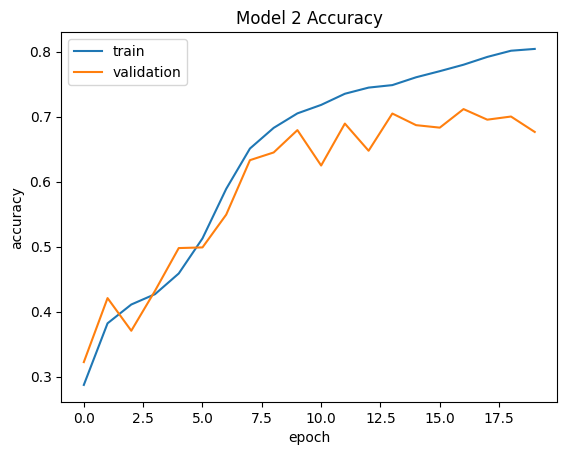

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_2_v1.history['accuracy'])
plt.plot(model_2_v1.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.68      0.59      0.63        32
           2       0.59      0.69      0.64        32
           3       0.96      0.78      0.86        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.74      0.73      0.73       128



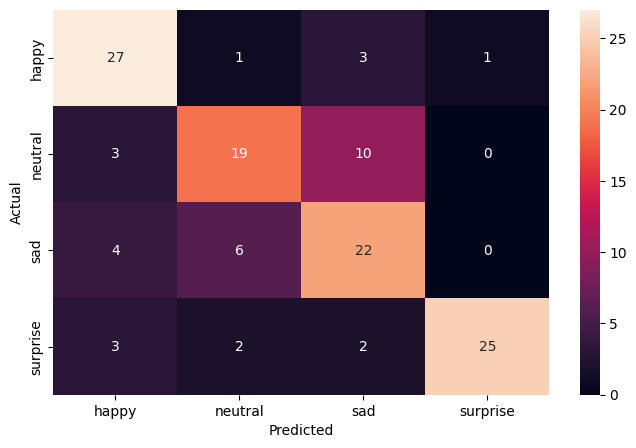

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_2.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 2 Performance:**
*   Model 2 has 807396 trainable parameters, trained in 10m 4s.
*   Model 2 accuracy is 80% on the training data and 67% on the validation data.
*   Model 2 accurately predicts 73% of test data images.
*   There is a lot of noise in the validation accuracy.
*   Model 1 most accurately predicts images labeled 'happy' and 'surprise'.
*   The most frequently misclassified images are 'neutral' and 'sad', often confused.

**Observations & Insights:**
<br> Model 2 is more complex, including additional convolutional blocks, and batch normalization layers. The final version also includes additional dense layers, and increased dropout to address overfitting. The increased model complexity improved accuracy, and computational demands.

Adding dense layers significantly improved accuracy over Model 1, in
each class and on the whole. But accuracy is still low, 74%. This indicates that the model architecture may not be the primary force in determining accuracy. Rather, low accuracy may be the result of data quality and distributions, as observed in the exploratory data analysis.

Increasing model complexity may further improve performance, even if bounded by external factors.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
BATCH_SIZE = 32

# build data loaders for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    brightness_range = (0.0, 2.0),
    shear_range = 0.3,
    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(
    '/content/Facial_emotion_images/train',
    color_mode = 'rgb',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_set = test_datagen.flow_from_directory(
    '/content/Facial_emotion_images/test',
    color_mode = 'rgb',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE*4,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    brightness_range = (0.5, 1.5),
    shear_range = 0.3,
    horizontal_flip = True)

validation_set = validation_datagen.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    color_mode = 'rgb',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (IMG_SIZE, IMG_SIZE, 3))

for layer in vgg.layers:
    layer.trainable = False

# once architecture explored, commenting code to display summary
# vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step


### **Model Building**

- Import VGG16 up to the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# create the model
model_3 = Sequential()

# after comparison, we have elected to import all but the top layers of the vgg base
model_3.add(vgg)

model_3.add(Flatten())

model_3.add(Dense(256, activation = 'relu'))

model_3.add(Dense(128, activation = 'relu'))

model_3.add(Dropout(0.30))

model_3.add(Dense(64, activation = 'relu'))

model_3.add(BatchNormalization())

model_3.add(Dense(4, activation = 'softmax'))

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (Batch  (None, 64)                2

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint("./model_3.keras", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [es, mc, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_3.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_3_v1 = model_3.fit(train_set, validation_data = validation_set, epochs = 20, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3210 - accuracy: 0.3759
Epoch 1: val_accuracy improved from -inf to 0.44746, saving model to ./model_3.keras
473/473 [==============================] - 38s 72ms/step - loss: 1.3210 - accuracy: 0.3759 - val_loss: 1.1809 - val_accuracy: 0.4475 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2198 - accuracy: 0.4378
Epoch 2: val_accuracy improved from 0.44746 to 0.49749, saving model to ./model_3.keras
473/473 [==============================] - 33s 70ms/step - loss: 1.2198 - accuracy: 0.4378 - val_loss: 1.1665 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1893 - accuracy: 0.4608
Epoch 3: val_accuracy improved from 0.49749 to 0.50553, saving model to ./model_3.keras
473/473 [==============================] - 35s 75ms/step - loss: 1.1893 - accuracy: 0.4608 - val_loss: 1.1235 - val_accuracy: 0.5055 - lr: 0.0010
Epoch 4/20
47

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 3 accuracy is {int(model_3_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_3_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 3 accuracy is 51% on the training data and 52% on the validation data.


### **Evaluating the VGG16 model**

In [ ]:
images, categories = next(test_set)
accuracy = model_3.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 3 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 20ms/step - loss: 1.0887 - accuracy: 0.4922
Model 3 accurately predicts 49% of test data images.


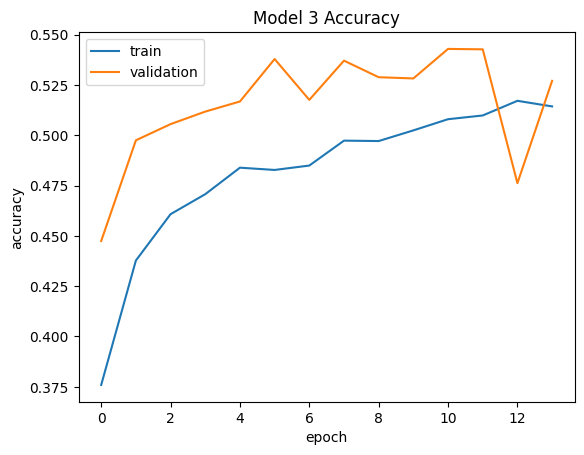

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_3_v1.history['accuracy'])
plt.plot(model_3_v1.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        32
           1       0.38      0.38      0.38        32
           2       0.47      0.44      0.45        32
           3       0.84      0.66      0.74        32

    accuracy                           0.49       128
   macro avg       0.52      0.49      0.50       128
weighted avg       0.52      0.49      0.50       128



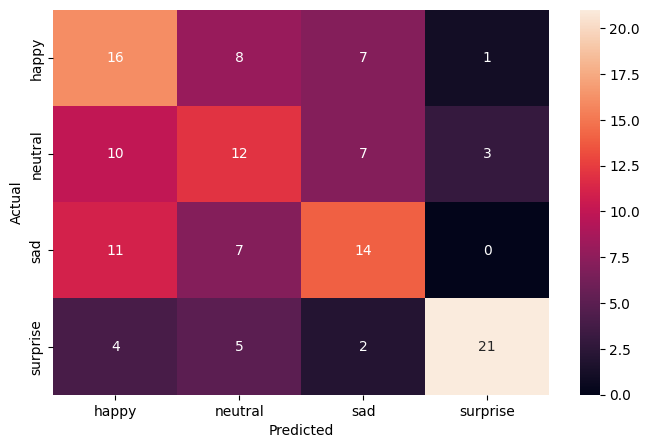

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_3.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Model 3 Performance:**
*   Model 3 has 172868 trainable parameters, trained in 8m 29s: training ended early, after 14 epochs.
*   Model 3 accuracy is 50% on the training data and 51% on the validation data.
*   Model 3 accurately predicts 47% of test data images.
*   Model 3 accurately classified 'surprised' images the most.
*   Model 3 misclassified 'neutral' images the most.

**Observations & Insights:**
<br> Early stopping is applied in epoch 14. Although training accuracy is improving, it is consistently low. Validation accuracy fluctuates, and fails to improve.
<br>

I made several unsuccessful modifications to improve the accuracy of Model 3. Adjusting the optimizer to SGD, with learning rate 0.01 showed some improvement, but increased computational loads, and model performance was still poor. Additional convolutional blocks were added to try improve accuracy, including regularization layers, batch normalization and dropout to address overfitting. There is less noise in the validation data, but model performance decreased.

Model 3 has very low accuracy compared to the CNNs trained on the data set. Model 3 uses the VGG16 pretrained model as the convolutional base. It is possible the poor performance of Model 3 is due to the pretrained base, as it was designed to detect and classify a large variety of objects in high quality, color images. The benefits of the relatively complex pretrained base are not realized on a data set consisting of low resolution images of faces.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as apps
from tensorflow.keras import Model
from keras import layers

Resnet = apps.ResNet101(include_top = False, weights = "imagenet", input_shape = (IMG_SIZE, IMG_SIZE, 3))
Resnet.trainable = False

# once architecture explored, commenting code to display summary
# Resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
# import ResNet layers up to 'conv5_block3_add' as the base for model 4
transfer_layer = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_4 = Model(Resnet.input, pred) # Initializing the model

In [ ]:
model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_4.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [es, mc, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_4.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_4_v1 = model_4.fit(train_set, validation_data = validation_set, epochs = 10, callbacks = callbacks_list)

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.4806 - accuracy: 0.2583
Epoch 1: val_accuracy improved from -inf to 0.24432, saving model to ./model_4.keras
473/473 [==============================] - 51s 92ms/step - loss: 1.4806 - accuracy: 0.2583 - val_loss: 1.4551 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4107 - accuracy: 0.2598
Epoch 2: val_accuracy improved from 0.24432 to 0.32429, saving model to ./model_4.keras
473/473 [==============================] - 38s 80ms/step - loss: 1.4107 - accuracy: 0.2598 - val_loss: 1.3663 - val_accuracy: 0.3243 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.2600
Epoch 3: val_accuracy improved from 0.32429 to 0.36669, saving model to ./model_4.keras
473/473 [==============================] - 38s 81ms/step - loss: 1.3981 - accuracy: 0.2600 - val_loss: 1.3642 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/10
47

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 4 accuracy is {int(model_4_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_4_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 4 accuracy is 26% on the training data and 22% on the validation data.


### **Evaluating the ResNet Model**

In [ ]:
images, categories = next(test_set)
accuracy = model_4.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 4 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 44ms/step - loss: 1.3940 - accuracy: 0.2500
Model 4 accurately predicts 25% of test data images.


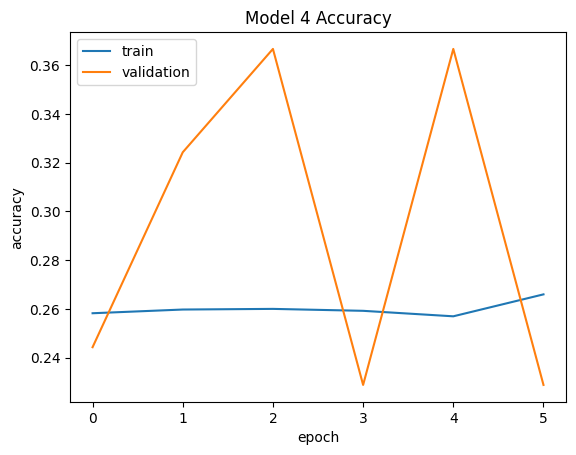

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_4_v1.history['accuracy'])
plt.plot(model_4_v1.history['val_accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 2s 36ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


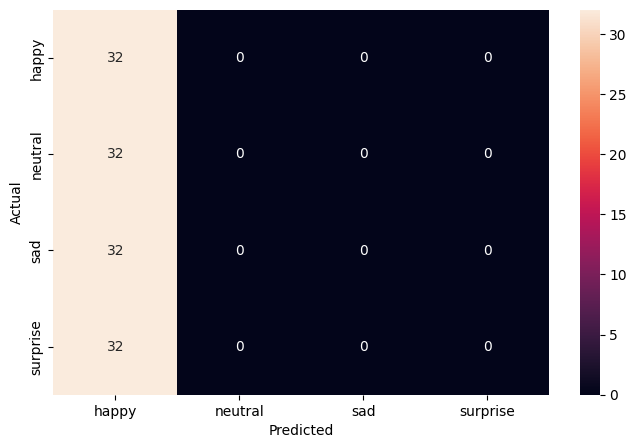

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_4.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 4 Performance:**
*   Model 4 has 2138948 trainable parameters, and trained in 4m 2s: training ended early, after 6 epochs.
*   Model 4 accuracy is 26% on the training data and 22% on the validation data.
*   Model 4 accurately predicts 25% of test data images.
*   It classifies every test image as 'happy'.

**Observations & Insights**
<br> Model 4 is the weakest performer, accuracy reduced to 25%. It is as accurate as randomly classifying test data. Model 4 is built on the ResNet CNN model. Again, it appears the benefits of the complex, pretrained base are lost on the low resolution images of just faces.

As in the previous model, attempts to improve accuracy are not prudent: any gains to be had from building new layers are modest and fail to overcome the poor fit of this model's base.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as apps
from tensorflow.keras import Model

EfficientNet = apps.EfficientNetV2B2(include_top = False, weights = "imagenet", input_shape= (48, 48, 3))
EfficientNet.trainable = False

35839040/35839040 [==============================] - 0s 0us/step


In [ ]:
model_5 = Sequential()

model_5.add(EfficientNet)

model_5.add(Flatten())

model_5.add(Dense(256, activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))

model_5.add(Dense(128, activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))

model_5.add(Dense(4, activation = 'softmax'))

model_5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 2, 2, 1408)        8769374   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5632)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               1442048   
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)              

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_5.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [es, mc, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_5.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_5_v1 = model_5.fit(train_set, validation_data = validation_set, epochs = 10, callbacks = callbacks_list)

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.5375 - accuracy: 0.2592
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to ./model_5.keras
473/473 [==============================] - 51s 84ms/step - loss: 1.5375 - accuracy: 0.2592 - val_loss: 1.3862 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4431 - accuracy: 0.2540
Epoch 2: val_accuracy improved from 0.22885 to 0.24955, saving model to ./model_5.keras
473/473 [==============================] - 36s 77ms/step - loss: 1.4431 - accuracy: 0.2540 - val_loss: 1.3557 - val_accuracy: 0.2495 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.4117 - accuracy: 0.2618
Epoch 3: val_accuracy did not improve from 0.24955
473/473 [==============================] - 35s 75ms/step - loss: 1.4117 - accuracy: 0.2618 - val_loss: 1.5880 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/10
472/473 [============================>.

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 5 accuracy is {int(model_5_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_5_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 5 accuracy is 26% on the training data and 22% on the validation data.


### **Evaluating the EfficientnetNet Model**

In [ ]:
images, categories = next(test_set)
accuracy = model_5.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 5 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 24ms/step - loss: 1.4173 - accuracy: 0.2578
Model 5 accurately predicts 25% of test data images.


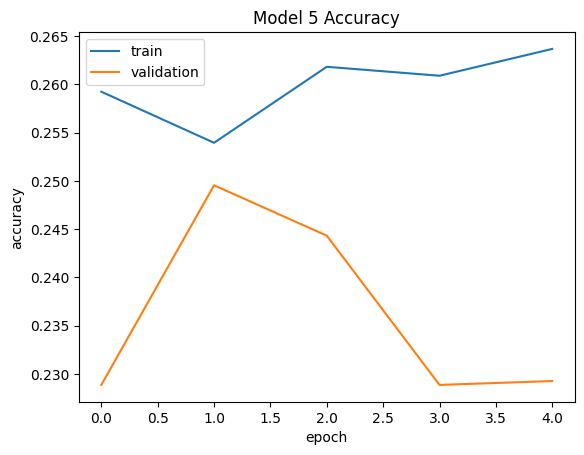

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_5_v1.history['accuracy'])
plt.plot(model_5_v1.history['val_accuracy'])
plt.title('Model 5 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        32
           1       0.25      0.97      0.40        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.26       128
   macro avg       0.15      0.26      0.13       128
weighted avg       0.15      0.26      0.13       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


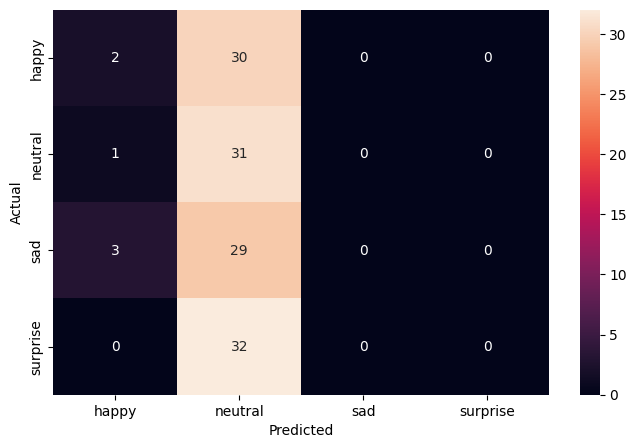

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_5.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 5 Summary:**
*   Model 5 has 1476228 trainable parameters, and trained in 3m 19s, ending early after 6 epochs
*   Model 5 accuracy is 26% on the training data and 22% on the validation data.
*   Model 5 accurately predicts 26% of test data images: it classifies nearly all images from the test data as 'neutral'.



**Observations and Insights:**
<br> Model 5 performance is very low, the weakest performer of the project. Training ended early after 6 epochs, because performance was not imrpoving. Training accuracy is low and fails to improve, validation accuracy is low, fluctuates, and fails to improve. Initial architecture classifies all images from the test data as 'neutral'.

Again, we expect low accuracy is a result of pretrained weights in the tranfered layers. The images we are working to classify are significantly different than images used to train the base model, resulting in poor performance. As in the previous model, attempts to improve accuracy are not prudent: any gains to be had from building new layers are modest and fail to overcome the poor fit of this model's base.

**Note: You can even go back and build your own architecture on top of the EfficientNet Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
BATCH_SIZE = 32

# build data loaders for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    brightness_range = (0.0, 2.0),
    shear_range = 0.3,
    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(
    '/content/Facial_emotion_images/train',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_set = test_datagen.flow_from_directory(
    '/content/Facial_emotion_images/test',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE*4,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

validation_set = validation_datagen.flow_from_directory(
    '/content/Facial_emotion_images/validation',
    color_mode = 'grayscale',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    classes = CATEGORIES,
    shuffle = True)

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
model_6 = Sequential()

model_6.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(pool_size = 2))
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(pool_size = 2))
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters = 512, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(pool_size = 2))
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters = 512, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(pool_size = 2))
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(pool_size = 2))
model_6.add(Dropout(0.2))

model_6.add(Flatten())

model_6.add(Dense(256, activation = 'relu'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))

model_6.add(Dense(128, activation = 'relu'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))

model_6.add(Dense(4, activation = 'softmax'))

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

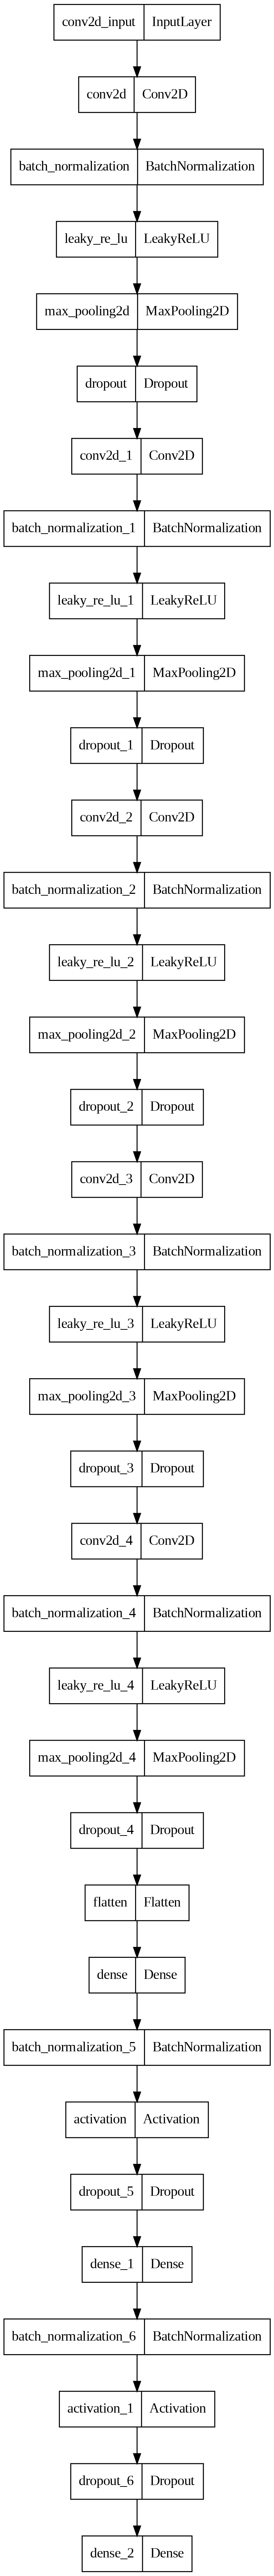

In [ ]:
# can I get a pretty figure of this model for the presentation?
# went with drag and drop drawio.com; I will have to figure out how to code this another time...

from keras.utils import plot_model

plot_model(model_6, to_file = "model_6.png", show_shapes = False, show_dtype = False, show_layer_names = True, rankdir = "TB", expand_nested = False, dpi = 200)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_6.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_6.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
model_6_v1 = model_6.fit(train_set, validation_data = validation_set, epochs = 20, callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.5381 - accuracy: 0.2684
Epoch 1: val_accuracy improved from -inf to 0.25859, saving model to ./model_6.keras
473/473 [==============================] - 26s 44ms/step - loss: 1.5381 - accuracy: 0.2684 - val_loss: 1.4268 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4214 - accuracy: 0.2776
Epoch 2: val_accuracy improved from 0.25859 to 0.30681, saving model to ./model_6.keras
473/473 [==============================] - 18s 39ms/step - loss: 1.4214 - accuracy: 0.2776 - val_loss: 1.3704 - val_accuracy: 0.3068 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3692 - accuracy: 0.3115
Epoch 3: val_accuracy improved from 0.30681 to 0.38517, saving model to ./model_6.keras
473/473 [==============================] - 22s 47ms/step - loss: 1.3692 - accuracy: 0.3115 - val_loss: 1.2893 - val_accuracy: 0.3852 - lr: 0.0010
Epoch 4/20
47

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 6 accuracy is {int(model_6_v1.history['accuracy'][-1]*100)}% on the training data and {int(model_6_v1.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 6 accuracy is 66% on the training data and 73% on the validation data.


### **Evaluating the Model on Test Set**

In [ ]:
images, categories = next(test_set)
accuracy = model_6.evaluate(images, categories)

# print the accuracy on the test data
print(f"Model 6 accurately predicts {int(accuracy[-1]*100)}% of test data images.")

4/4 [==============================] - 0s 9ms/step - loss: 0.6362 - accuracy: 0.7734
Model 6 accurately predicts 77% of test data images.


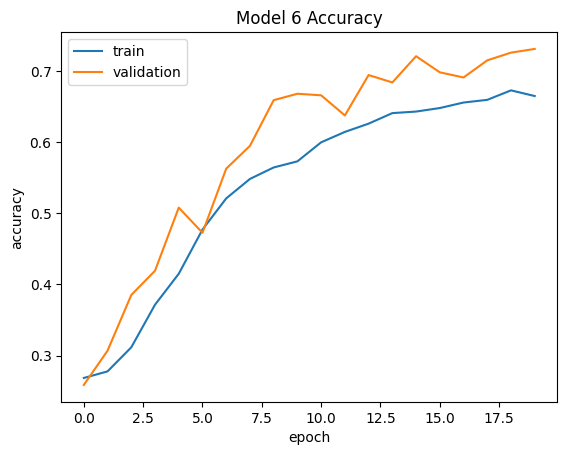

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(model_6_v1.history['accuracy'])
plt.plot(model_6_v1.history['val_accuracy'])
plt.title('Model 6 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.67      0.69      0.68        32
           2       0.66      0.72      0.69        32
           3       0.96      0.84      0.90        32

    accuracy                           0.77       128
   macro avg       0.78      0.77      0.78       128
weighted avg       0.78      0.77      0.78       128



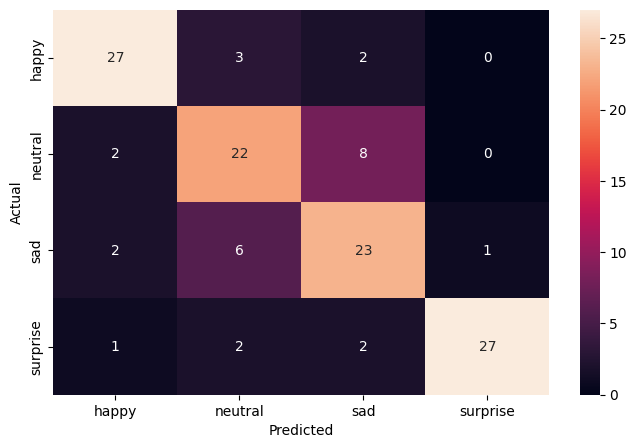

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_6.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model 6 Performance:**
*   Model 6 has 1677124 trainable parameters, and trained in 6m 37s.
*   Model 6 accuracy is 66% on the training data and 73% on the validation data.
*   Model 6 accurately predicts 77% of test data images.
*   The most common images misclassified are again 'sad' and 'neutral'.

**Observations and Insights:**
<br> Model 6 is the best performer, accurately classifying images in 77% of the test data. It is significant improvement in performance metrics over both the pretrained models and the initial custom-built CNNs. There is still noise in the validation data, but we may attribute this to relatively few validation images. While accuracy is still moderate-low, we do not expect that fine tuning will produce additional gains.

### **Model Comparisons | Final Model Selection**

**Comparing Models**
<br> The primary performance metric is accuracy of the models. In analyzing each model's performance, we found design impacts accuracy at each stage. Despite the low image quality and mislabeled data, the custom CNNs in this project performed quite well.

Model | Achitechture | # Trainable Parameters | Training Time | Training/Validation | Testing Accuracy
--- | --- | --- | --- | --- | ---
`Model 1` | `Custom 3-block CNN` | `605,060` | `7m 14s` | `69% / 69%` | `69%`
`Model 2` | `Custom 4-block CNN` | `806,244` | `10m 4s` | `80% / 67%` | `73%`
`Model 3` | `Transfer VGG16 base` | `172,868` | `8m 29s` | `51% / 52%` | `49%`
`Model 4` | `Transfer ResNet base` | `2,138,948` | `4m 2s` | `26% / 22%` | `25%`
`Model 5` | `Transfer EfficientNet base` | `1,476,228` | `3m 19s` | `26% / 22%` | `26%`
`Model 6` | `Custom 5-block CNN` | `1,677,124` | `6m 37s` | `66% / 73%` | `77%`

The custom built CNNs outperformed the transfer learning models at every stage of the task. Weights for these are trained on a narrow type of images: close up photos of a face in grayscale with low resolution. This allowed for better prediction of labels on images of the same type.

The increased complexity of Model 6 increased the accuracy of the model, with only modest increase to computional demands.

**Final Model**
<br> The best performing model is Model 6. We were able to achieve 77% accuracy on the test data with low training time and computational demands. The model architecture is designed for better prediction of labels on the test data.

The increased complexity of Model 6 yielded higher accuracy than the previous custom built CNNs. It includes an additional convolutional block for feature extraction and dense layers to improve accuracy. The batch normalization layers speed up the training process, and the increased dropout rate works to address overfitting.

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.67      0.69      0.68        32
           2       0.66      0.72      0.69        32
           3       0.96      0.84      0.90        32

    accuracy                           0.77       128
   macro avg       0.78      0.77      0.78       128
weighted avg       0.78      0.77      0.78       128



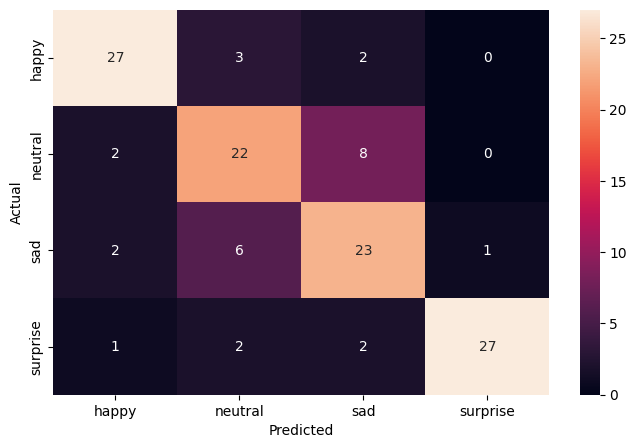

In [ ]:
# Plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

images, categories = next(test_set)
pred = model_6.predict(images)
pred = np.argmax(pred, axis = -1)
y_true = np.argmax(categories, axis = -1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Conclusion:**
The challenge of providing real-time feedback about a user's emotional state is now more apparent. An application tasked with identifying a user's emotional state in an online classroom, for example, would require a complex convolutional neural network, with high quality input data.

**Executive Summary:**
<br> In this project, we discover that the quality of data is a limiting factor in accuracy for machine learning models. Accurately labeling data, and constructing well-defined classes are essential to accruate classification.

We also find that transfer learning is less effective than expected in the current task. We tested models built on the VGG16, ResNet, and EfficientNet models. While these models are proven effective in a variety of image recognition tasks, the pretrained weights are not effective in classifying the emotions labeled in our testing data. Since we are interested in testing a narrow type of image, we should train the model on this same type using a custom built CNN.

Additionally, we demonstrate how model complexity and architecture can be designed to optimize performance.

**Problem & Solution Summary:**
<br> Despite challenges with data quality, we are successful in meeting the project objectives: to design models to predict the emotion conveyed through facial expressions in images, and identify factors that improve performance while limiting computational demands.

Model 6 meets these objectives by leveraging:
- convolutional and dense layers for feature detection and extraction
- pooling layers for locating and measuring distance between features
- batch normalization layers to speed up training
- drop out layers to address overfitting

This model could be deployed in an online learning environment to capture nonverbal cues of students, and provide feedback to an instructor about a student's emotional state.

**Recommendations:**
<br> To further increase accuracy, we recommend cleaning the existing data to correct mislabeled images and remove images that convey ambiguous or blended emotions. Retraining the model on higher quality data will raise the upper bound on accuracy. While cleaning/relabeling the data would require a significant time investment, it could dramatically impact the model's performance.  

We also recommend redistributing the images to achieve better distributions of the training, validation, and testing split. While the optimal split ratio varies, we should attempt the rough standard, 70% training, 15% validation, and 15% testing data.

Future data collection efforts may aquire higher resolution images. In this case, we recommend reevaluating pretrained models for fitness. Should future data include color images of higher resolution, we expect transfer learning models to perform better than on the existing data.